In [44]:
import numpy as np
import matplotlib.pyplot as plt

params = {
    'legend.fontsize': 18,
    'figure.figsize': (15, 10),
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15
}
plt.rcParams.update(params)

In [45]:
# simulate standard brownian motion with time between 0 and 1 and n steps
def brownian_motion(n):
    dt = 1/n
    x = np.zeros(n+1)

    for i in range(n):
        x[i+1] = x[i] + np.sqrt(dt) * np.random.normal(0, 1)
    return x

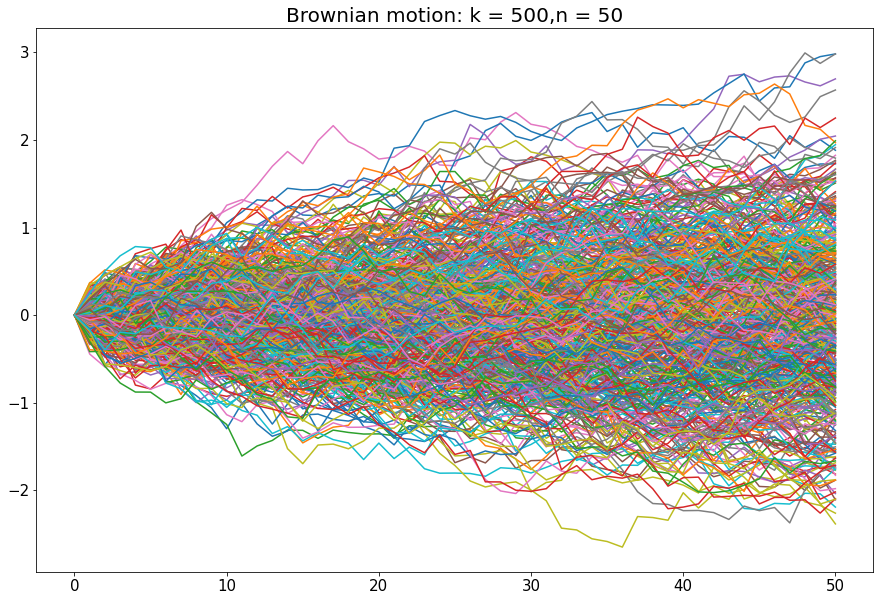

In [46]:
# simulate k runs of brownian motion with n steps
k, n, = 500, 50
X = [brownian_motion(n) for i in range (k)]

# plot all brownian motion paths
for i in range(k):
    plt.plot(X[i])

plt.title(f"Brownian motion: k = {k},n = {n}")
plt.show()

In [42]:
# convert X to a numpy array
X = np.array(X)

# Test normality of the brownian motion at every step
from scipy.stats import shapiro

for i in range(1, n+1):
    stat, p = shapiro(X[:, i])
    # print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p <= alpha:
        print(f'Sample at time = {i} does not look Gaussian (reject H0)')

Sample at time = 15 does not look Gaussian (reject H0)


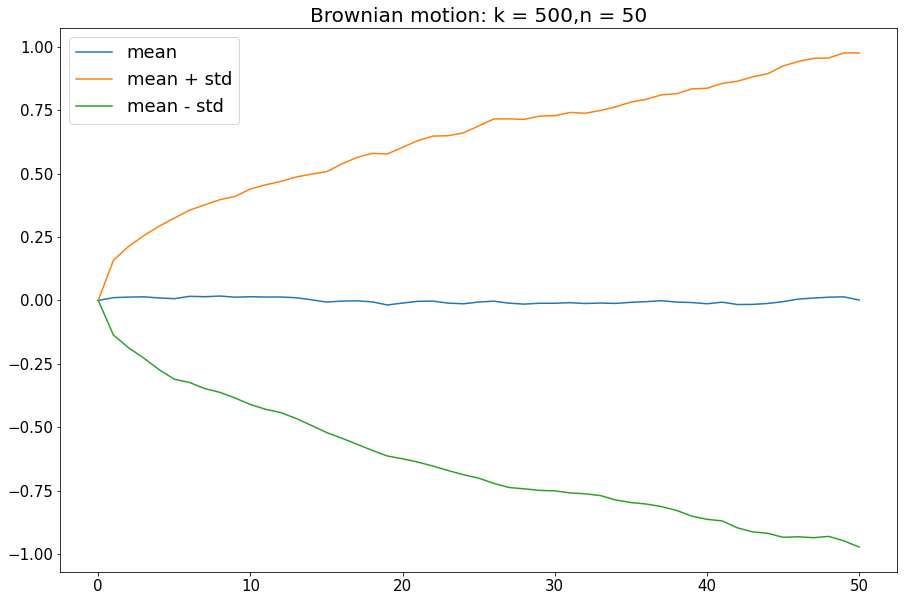

In [43]:
# calculate the mean and standard deviation of each column
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

# plot the mean and standard deviation
plt.title(f"Brownian motion: k = {k}, n = {n}")
plt.plot(mean, label="mean")
plt.plot(mean + std, label="mean + std")
plt.plot(mean - std, label="mean - std")
plt.legend()
plt.show()